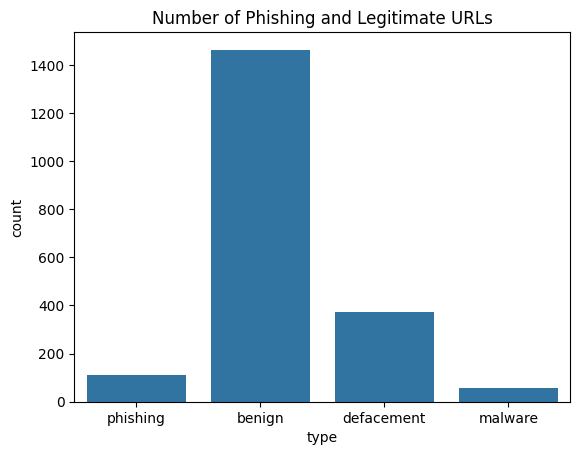

In [ ]:
!pip install sentence-transformers
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('malicious_phish.csv', nrows=2000)

sns.countplot(x='type', data=df)
plt.title('Number of Phishing and Legitimate URLs')
plt.show()


df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['url'])
y = df['type']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model1 = LogisticRegression(max_iter=10000,class_weight='balanced')
model2 = RandomForestClassifier(random_state=42, class_weight='balanced')
model3 = GradientBoostingClassifier(random_state=42)

In [ ]:
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
lo_accuracy = accuracy_score(y_test, y_pred)
print("Model: Logistic Regression")
print(f'Accuracy: {lo_accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nK-Cross Validation :\n", cross_val_score(model1, X, y, cv=5).mean())

Model: Logistic Regression
Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

      benign       0.97      0.99      0.98       147
  defacement       0.93      1.00      0.96        40
     malware       1.00      0.56      0.71         9
    phishing       0.33      0.25      0.29         4

    accuracy                           0.95       200
   macro avg       0.81      0.70      0.74       200
weighted avg       0.95      0.95      0.95       200


K-Cross Validation :
 0.9268546365914787


In [ ]:
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print("Model: Random Forest")
print(f'Accuracy: {rf_accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nK-Cross Validation :\n", cross_val_score(model2, X, y, cv=5).mean())

Model: Random Forest
Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

      benign       0.98      1.00      0.99       147
  defacement       0.93      1.00      0.96        40
     malware       1.00      0.56      0.71         9
    phishing       0.50      0.25      0.33         4

    accuracy                           0.96       200
   macro avg       0.85      0.70      0.75       200
weighted avg       0.96      0.96      0.96       200


K-Cross Validation :
 0.9248471177944861


In [ ]:
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
gd_accuracy = accuracy_score(y_test, y_pred)
print("Model: Gradient Boosting")
print(f'Accuracy: {gd_accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nK-Cross Validation :\n", cross_val_score(model3, X, y, cv=5).mean())

Model: Gradient Boosting
Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

      benign       0.98      0.99      0.99       147
  defacement       0.93      1.00      0.96        40
     malware       1.00      0.56      0.71         9
    phishing       0.33      0.25      0.29         4

    accuracy                           0.96       200
   macro avg       0.81      0.70      0.74       200
weighted avg       0.96      0.96      0.96       200


K-Cross Validation :
 0.9248458646616541


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LogisticRegression

bert_model = SentenceTransformer('all-MiniLM-L6-v2')

X_bert = bert_model.encode(df['url'].tolist())

X_train_bert, X_test_bert, y_train, y_test = train_test_split(X_bert, y, test_size=0.1, random_state=42)

bert_classify = LogisticRegression(max_iter=1000)
bert_classify.fit(X_train_bert, y_train)

bert_pred = bert_classify.predict(X_test_bert)
bert_accuracy = accuracy_score(y_test, bert_pred)
print("Model: BERT")
print(f'Accuracy: {bert_accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, bert_pred))
print("\nK-Cross Validation :\n", cross_val_score(bert_classify, X_bert, y, cv=5).mean())

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Model: BERT
Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

      benign       0.95      0.98      0.96       147
  defacement       0.88      0.93      0.90        40
     malware       1.00      0.44      0.62         9
    phishing       0.00      0.00      0.00         4

    accuracy                           0.93       200
   macro avg       0.71      0.59      0.62       200
weighted avg       0.92      0.93      0.92       200


K-Cross Validation :
 0.8962894736842106


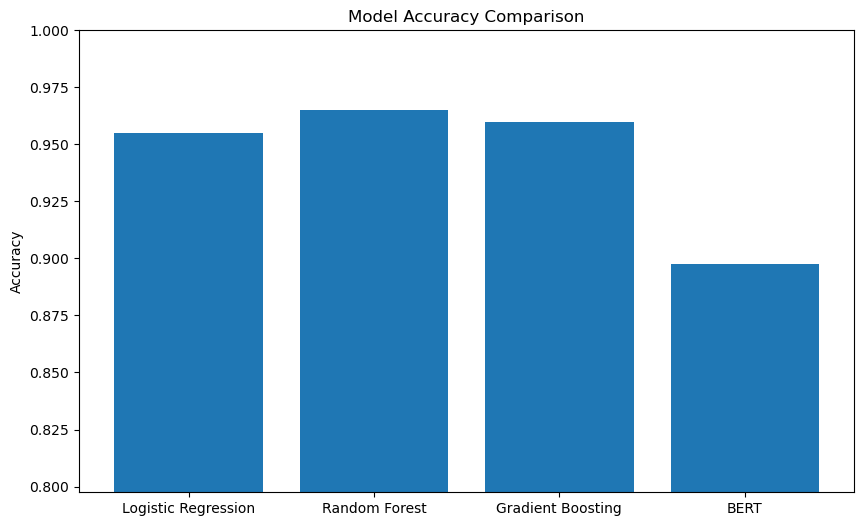

In [ ]:
accuracies = {
    "Logistic Regression": lo_accuracy,
    "Random Forest": rf_accuracy,
    "Gradient Boosting": gd_accuracy,
    "BERT": bert_accuracy
}

plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(min(accuracies.values())-0.1, 1.0)

plt.show()